In [6]:
import keras
try:
    from keras.utils import to_categorical
except:
    from tensorflow.keras.utils import to_categorical
    
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
from keras import backend as K
K._get_available_gpus()

[]

In [8]:
# Get the data, train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use 20% of the train data as validation
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69
)

print(f"We have {x_train.shape[0]} images of size {x_train.shape[1]}x{x_train.shape[2]} for training!")

print(f"We have {x_validation.shape[0]} images of size {x_validation.shape[1]}x{x_validation.shape[2]} for validation!")

print(f"We have {x_test.shape[0]} images of size {x_test.shape[1]}x{x_test.shape[2]} for testing!")

We have 48000 images of size 28x28 for training!
We have 12000 images of size 28x28 for validation!
We have 10000 images of size 28x28 for testing!


In [9]:
#Reshape
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

#PARA FICAR COM ONE HOT ENCONDING, PODEMOS NAO USAR E MUDAMOS SO A LOSS FUNCTION
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

#NORMALIZAR
x_train /= 255
x_validation /= 255
x_test /= 255

print('x_train shape:', x_train.shape)

x_train shape: (48000, 28, 28, 1)


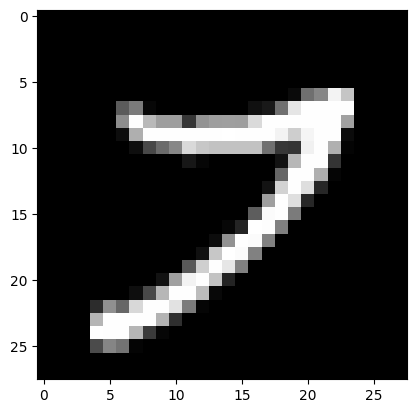

In [10]:
plt.imshow(x_train[1430].reshape(28,28), cmap='gray')
plt.show()

In [11]:
batch_size = 128
num_classes = 10
epochs = 10

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [14]:
#No meu pc (andre) demora tipo 2m30s
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 [==============================] - 17s 44ms/step - loss: 0.4376 - accuracy: 0.8639 - val_loss: 0.0725 - val_accuracy: 0.9772
Epoch 2/10
375/375 [==============================] - 14s 38ms/step - loss: 0.1322 - accuracy: 0.9651 - val_loss: 0.0569 - val_accuracy: 0.9831
Epoch 3/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0897 - accuracy: 0.9762 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0736 - accuracy: 0.9806 - val_loss: 0.0480 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0608 - accuracy: 0.9838 - val_loss: 0.0522 - val_accuracy: 0.9854
Epoch 6/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0528 - accuracy: 0.9862 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0434 - accuracy: 0.9882 - val_loss: 0.0350 - val_accuracy:

Validation: acc is 99.09999966621399% and loss is 0.03429597243666649


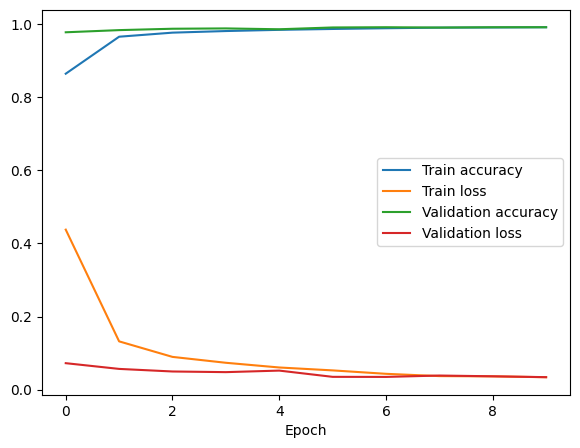

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend(loc="best")

validation_loss, validation_acc = model.evaluate(x_validation, y_validation, verbose=False)

print(f"Validation: acc is {validation_acc*100}% and loss is {validation_loss}")

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026471920311450958
Test accuracy: 0.992900013923645
